In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## img-1 points

img1_points = np.array([
    [381, 402],
    [452, 497],
    [671, 538],
    [501, 254],
    [506, 381],
    [474, 440],
    [471, 537],
    [498, 364],
    [706, 319],
    [635, 367]])

## img-2 points

img2_points = np.array([
    [390, 346],
    [439, 412],
    [651, 417],
    [477, 194],
    [482, 300],
    [456, 359],
    [454, 444],
    [475, 287],
    [686, 185],
    [606, 253]])

# F matrix

F = np.array([[-1.29750186e-06,  8.07894025e-07,  1.84071967e-03],
    [3.54098411e-06,  1.05620725e-06, -8.90168709e-03],
    [-3.29878312e-03,  5.14822628e-03,  1.00000000e+00]])

In [12]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')

In [27]:
def get_epipole(line1, line2):
    m1 = -line1[0]/line1[1]
    b1 = -line1[2]/line1[1]
    m2 = -line2[0]/line2[1]
    b2 = -line2[2]/line2[1]    
    xval = (b2-b1)/(m1-m2)
    yval = m1*xval + b1
    return [xval, yval]
    
# get epipole1
epipole1 = get_epipole(F[:,0], F[:,1])
epipole2 = get_epipole(F[0], F[1])

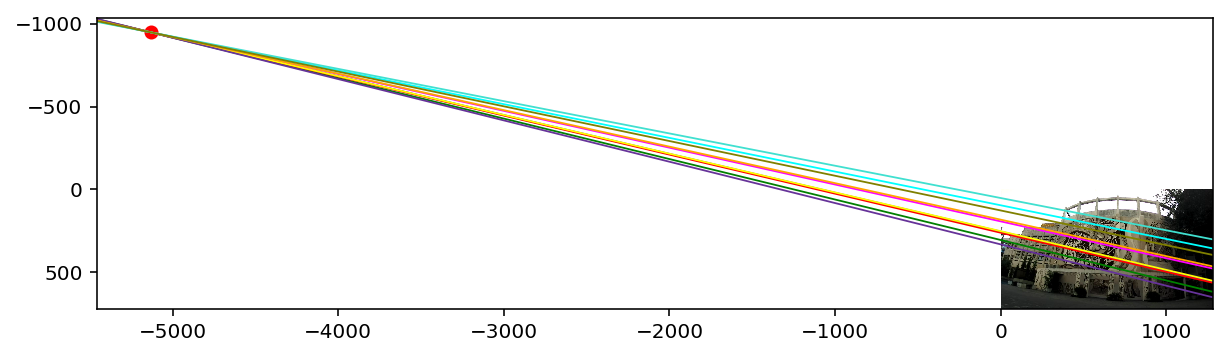

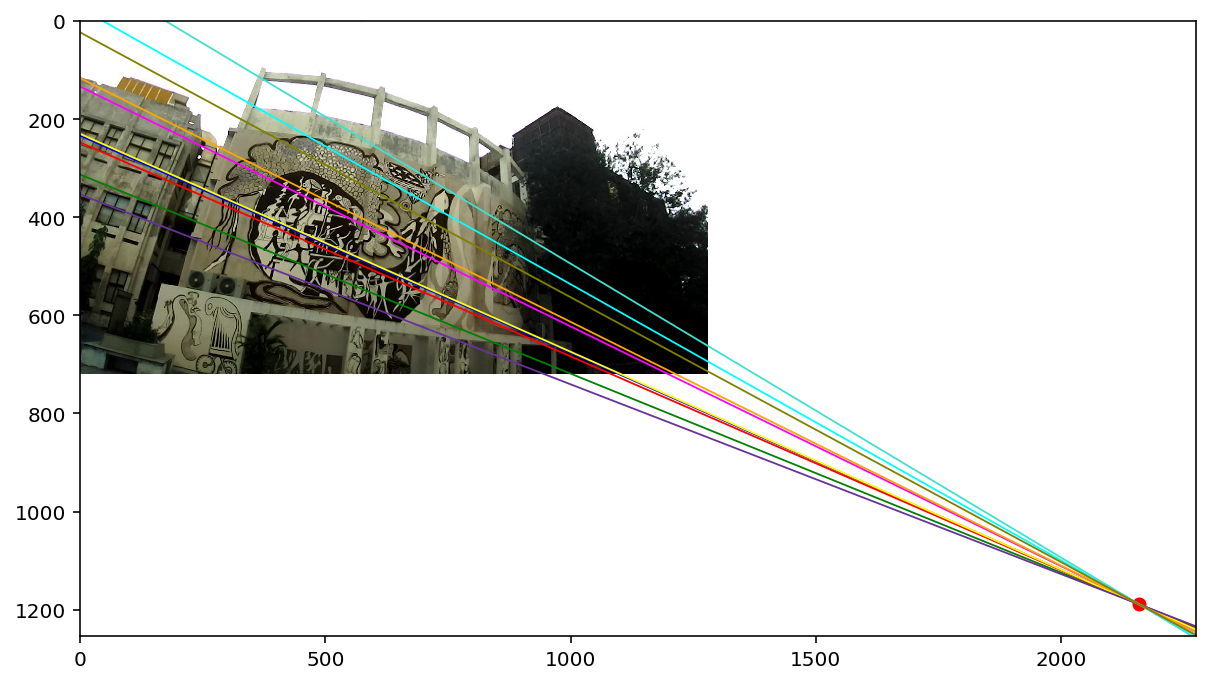

In [64]:
import matplotlib.lines as mlines
all_col = ['blue','green','red','cyan','magenta','yellow','rebeccapurple','orange','turquoise','olive']

def newline(p1, p2, col):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], c=col, linewidth=0.9)
    ax.add_line(l)
    return l

def for_x(x, mul):
    return (-mul[2] - mul[0]*x)/mul[1]

plt.figure(1,(10,10))
plt.imshow(img2)
plt.scatter(epipole1[0], epipole1[1], c='red') 
for i, points in enumerate(img1_points):
    mul = np.dot(F, np.concatenate((points,[1]),axis=0))
    x1 = 10
    y1 = for_x(x1, mul)
    x2 = 20
    y2 = for_x(x2, mul)
    newline([x1,y1],[x2,y2],all_col[i])
    #
    img2_pt = img2_points[i]
    #plt.scatter(img2_pt[0], img2_pt[1], c='white')
plt.savefig('1_c.png', dpi=200)
plt.show()
    
plt.figure(1,(10,10))    
plt.imshow(img1)
plt.scatter(epipole2[0], epipole2[1], c='red') 
for i, points in enumerate(img2_points):
    mul = np.dot(np.concatenate((points,[1]),axis=0), F)
    x1 = 10
    y1 = for_x(x1, mul)
    x2 = 20
    y2 = for_x(x2, mul)
    newline([x1,y1],[x2,y2],all_col[i])       
    #
    img1_pt = img1_points[i]
    #plt.scatter(img1_pt[0], img1_pt[1], c='white')
plt.savefig('1_d.png', dpi=200)
plt.show()

In [66]:
epipole2

[2159.166281782408, 1189.2681056305114]